In [199]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [200]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [201]:
NUM_CLASSES = 19

# 学習データ読み込み

In [202]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [203]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [205]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [206]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 42)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                860       
                                                                 
 dropout_19 (Dropout)        (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 19)                209       
                                                                 
Total params: 1279 (5.00 KB)
Trainable params: 1279 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [207]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=60, verbose=1)

In [208]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [209]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
37/43 [========================>.....] - ETA: 0s - loss: 2.9268 - accuracy: 0.0800 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 5ms/step - loss: 2.9212 - accuracy: 0.0801 - val_loss: 2.8584 - val_accuracy: 0.1137
Epoch 2/1000
 1/43 [..............................] - ETA: 0s - loss: 2.8653 - accuracy: 0.1250
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 2ms/step - loss: 2.8178 - accuracy: 0.1210 - val_loss: 2.7239 - val_accuracy: 0.1797
Epoch 3/1000
 1/43 [..............................] - ETA: 0s - loss: 2.7083 - accuracy: 0.1641

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 2ms/step - loss: 2.7056 - accuracy: 0.1554 - val_loss: 2.5769 - val_accuracy: 0.3084
Epoch 4/1000
 1/43 [..............................] - ETA: 0s - loss: 2.6378 - accuracy: 0.2109
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 2ms/step - loss: 2.5828 - accuracy: 0.1987 - val_loss: 2.4310 - val_accuracy: 0.3089
Epoch 5/1000
 1/43 [..............................] - ETA: 0s - loss: 2.4914 - accuracy: 0.1875
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 2ms/step - loss: 2.4550 - accuracy: 0.2344 - val_loss: 2.2875 - val_accuracy: 0.4187
Epoch 6/1000
 1/43 [..............................] - ETA: 0s - loss: 2.4413 - accuracy: 0.1953
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [=============

In [210]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/15 [=>............................] - ETA: 0s - loss: 0.8241 - accuracy: 0.7344

15/15 [==============================] - 0s 1ms/step - loss: 0.7611 - accuracy: 0.7543


In [211]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [212]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 43ms/step
[1.5230410e-01 5.1630318e-01 2.4426607e-05 9.3659828e-08 5.2574236e-02
 1.3242278e-02 5.1287352e-06 2.3807342e-13 1.4185277e-03 1.6581416e-01
 1.1499041e-02 2.7549203e-02 2.7320262e-05 1.7165217e-03 1.6443491e-03
 1.0479784e-02 8.3464179e-03 3.1333845e-03 3.3917807e-02]
1


# 混同行列

57/57 [==============================] - 0s 679us/step


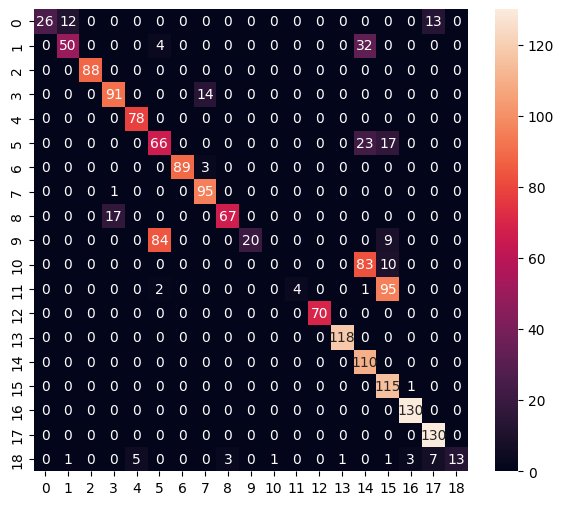

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.51      0.68        51
           1       0.79      0.58      0.67        86
           2       1.00      1.00      1.00        88
           3       0.83      0.87      0.85       105
           4       0.94      1.00      0.97        78
           5       0.42      0.62      0.50       106
           6       1.00      0.97      0.98        92
           7       0.85      0.99      0.91        96
           8       0.96      0.80      0.87        84
           9       1.00      0.18      0.30       113
          10       0.00      0.00      0.00        93
          11       1.00      0.04      0.08       102
          12       1.00      1.00      1.00        70
          13       0.99      1.00      1.00       118
          14       0.44      1.00      0.61       110
          15       0.47      0.99      0.63       116
          16       0.97      1.00      0.98       130
     

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [214]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [215]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpe7xdw8yn\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpe7xdw8yn\assets


7272

# 推論テスト

In [216]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [217]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [218]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [219]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [220]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5230417e-01 5.1630336e-01 2.4426497e-05 9.3659338e-08 5.2573990e-02
 1.3242171e-02 5.1287370e-06 2.3807169e-13 1.4185259e-03 1.6581421e-01
 1.1499054e-02 2.7549250e-02 2.7320268e-05 1.7165220e-03 1.6443362e-03
 1.0479781e-02 8.3464319e-03 3.1333661e-03 3.3917844e-02]
1
